# Import Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn
import cv2
from PIL import Image
from tqdm import tqdm

# Dataset Analyse

In [3]:
labels = np.load('../input/cancer-inst-segmentation-and-classification/Part 1/Images/types.npy')
images = np.load('../input/cancer-inst-segmentation-and-classification/Part 1/Images/images.npy',allow_pickle=True)
masks = np.load('../input/cancer-inst-segmentation-and-classification/Part 1/Masks/masks.npy',allow_pickle=True)

print(labels.shape)
print(images.shape)
print(masks.shape)

(2656,)
(2656, 256, 256, 3)
(2656, 256, 256, 6)


0  :  Adrenal_gland  has  134  samples in dataset.
1  :  Bile-duct  has  159  samples in dataset.
2  :  Bladder  has  21  samples in dataset.
3  :  Breast  has  827  samples in dataset.
4  :  Cervix  has  155  samples in dataset.
5  :  Colon  has  478  samples in dataset.
6  :  Esophagus  has  155  samples in dataset.
7  :  HeadNeck  has  70  samples in dataset.
8  :  Kidney  has  37  samples in dataset.
9  :  Liver  has  65  samples in dataset.
10  :  Lung  has  80  samples in dataset.
11  :  Ovarian  has  54  samples in dataset.
12  :  Pancreatic  has  78  samples in dataset.
13  :  Prostate  has  77  samples in dataset.
14  :  Skin  has  59  samples in dataset.
15  :  Stomach  has  50  samples in dataset.
16  :  Testis  has  60  samples in dataset.
17  :  Thyroid  has  80  samples in dataset.
18  :  Uterus  has  17  samples in dataset.


<BarContainer object of 19 artists>

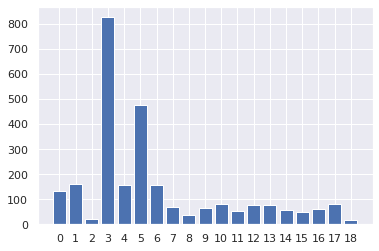

In [4]:
seaborn.set()
classes, counts = np.unique(labels, return_counts=True)

dictLabel = {}

for i, label in enumerate(classes):
    dictLabel[i] = label
    print(i," : ",label, " has ", counts[i], " samples in dataset.")

plt.bar(classes, 
        counts,
       tick_label = list(dictLabel.keys()))

There is 19 tissue types in the images of our dataset. Each tissue can contains nuclei of 5 differents types. We can first show some images of our dataset to see how it's looks like.

In [5]:
selected = np.random.randint(images.shape[0], size=18)
selected

array([ 783, 1682, 1842,  432, 2142, 1576,  962, 1072,  227, 2022, 1400,
       2031,  256, 1559, 2483, 1062, 1959, 1211])

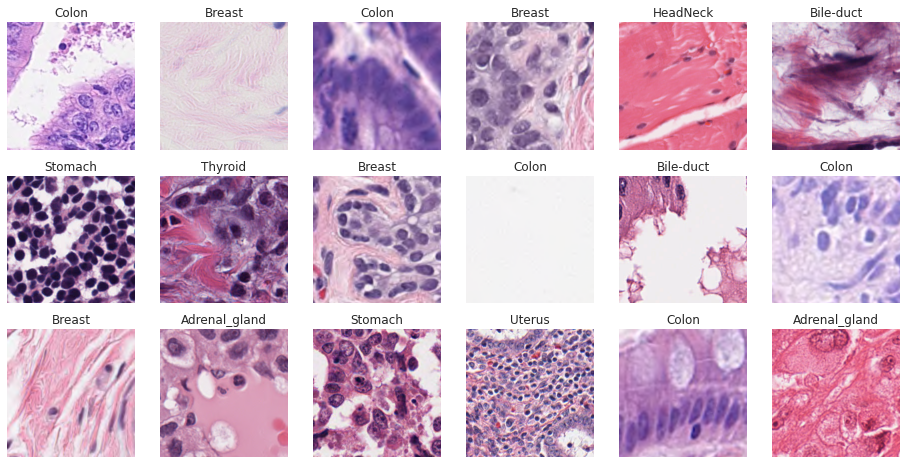

In [39]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(selected, start=1):
    plt.subplot(3, 6, i)
    image = images[idx, :, :, :].astype(int)
    plt.imshow(image) 
    plt.title(labels[idx])
    plt.axis('off')

Then, we can have a look to the masks. Masks has a shape : (2656, 256, 256, 6).
Indeed, the data set contains 2656 images and each images has a size 256x256. The mask give for each pixel of each images a vector of size 6 with 5 zeros and 1 integer != 0 (all pixels of the same nuclei have the same integer). This non zero integer define the type of nuclei the pixel belong to. 

For information, this is the correspondance between range of the this integer and type of nucleis(or not) the pixel belong to.
* 0: Neoplastic cells, 
* 1: Inflammatory, 
* 2: Connective/Soft tissue cells, 
* 3: Dead Cells, 
* 4: Epithelial, 
* 6: Non nuclei ,Background

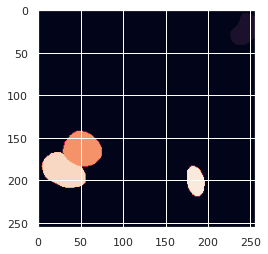

In [56]:
plt.imshow(masks[0,:,:,0])

In [58]:
print(masks[0][200][40])
print(masks[0][200][50])
print(masks[0][150][50])


[38.  0.  0.  0.  0.  0.]
[38.  0.  0.  0.  0.  0.]
[31.  0.  0.  0.  0.  0.]


Let's have a look on those masks for the selected images shown before.

Mask for nuclei of type : 0


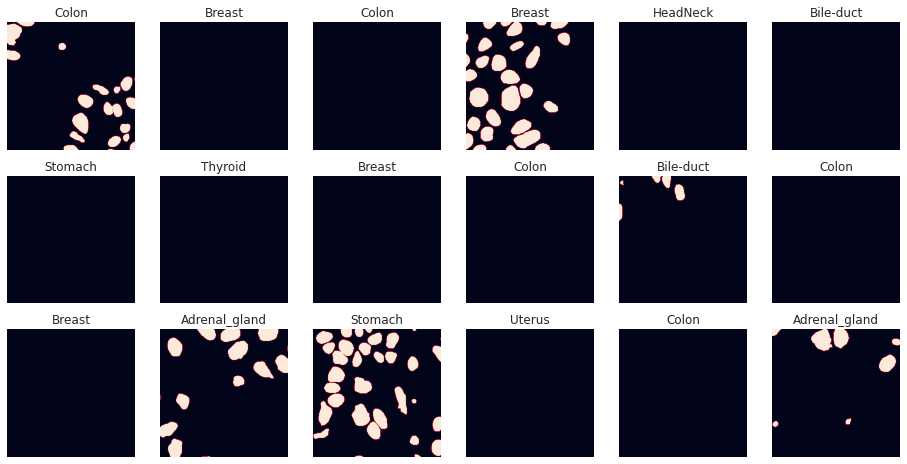

Mask for nuclei of type : 1


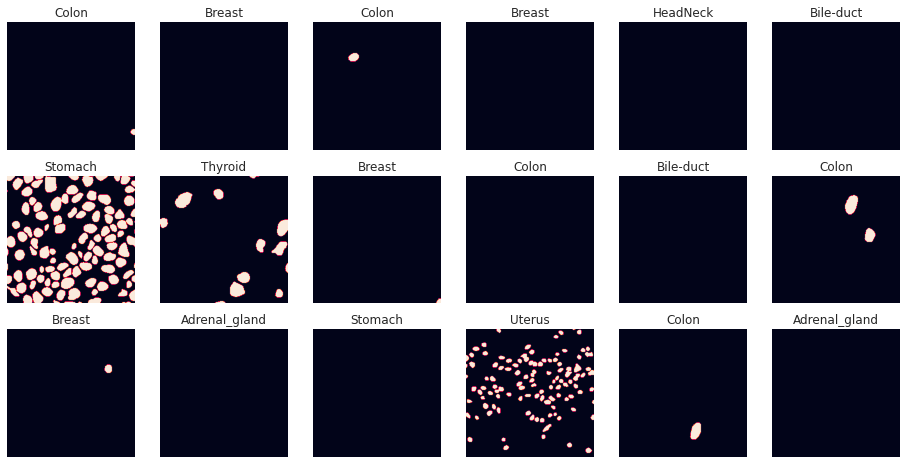

Mask for nuclei of type : 2


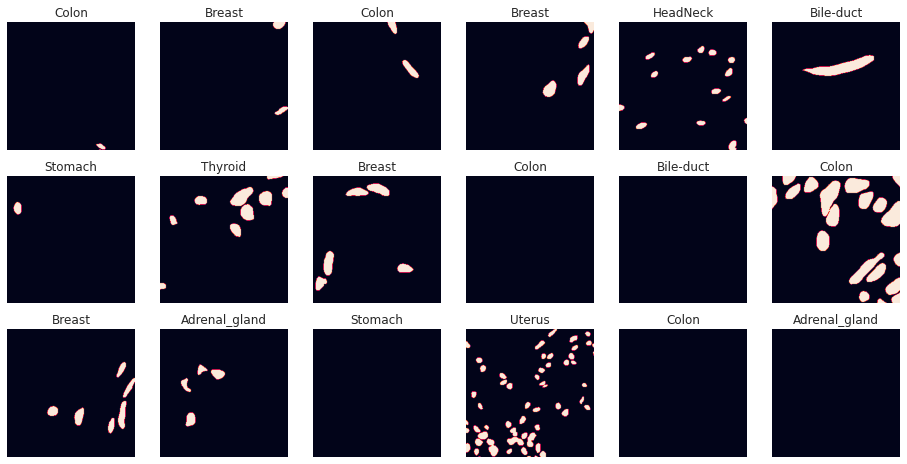

Mask for nuclei of type : 3


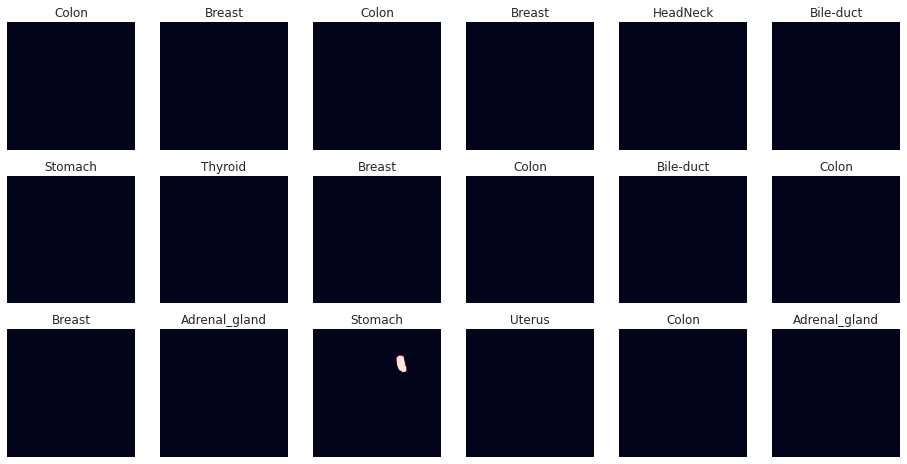

Mask for nuclei of type : 4


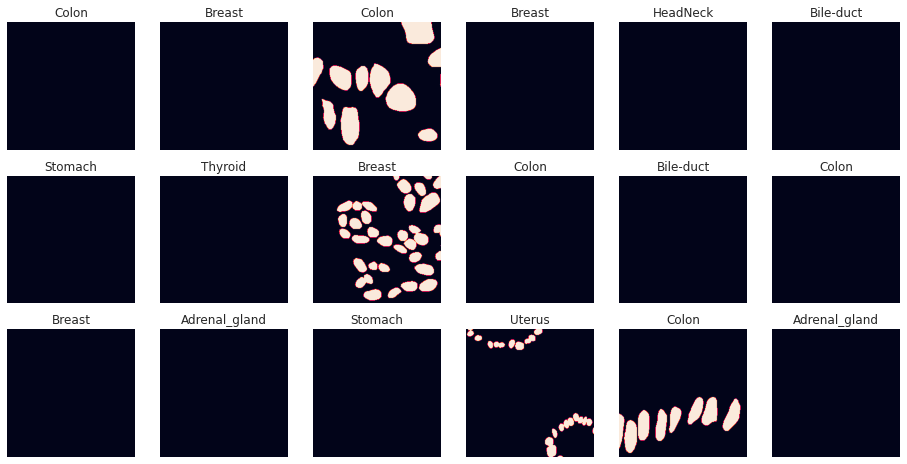

Mask for non nuclei part of the tissue


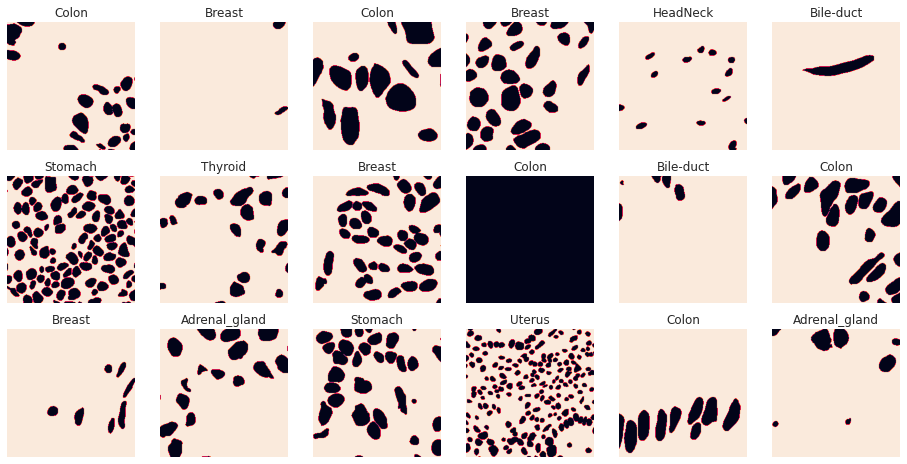

In [36]:
zeros = np.zeros_like(masks[0, :, :, 0], dtype=bool)
ones = np.ones_like(masks[0, :, :, 0], dtype=bool)

for j in range(6):
    if (j<5):
        print("Mask for nuclei of type :",j)
    else:
        print("Mask for non nuclei part of the tissue")
    plt.figure(figsize=(16, 8))
    for i, idx in enumerate(selected, start=1):
        plt.subplot(3, 6, i)

        combined_masks = masks[idx, :, :, j]  
        mask = np.where(combined_masks > 0., ones, zeros)

        plt.imshow(mask)

        plt.title(labels[idx])
        plt.axis('off')
    plt.show()
    print("=======================")